In [2]:
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

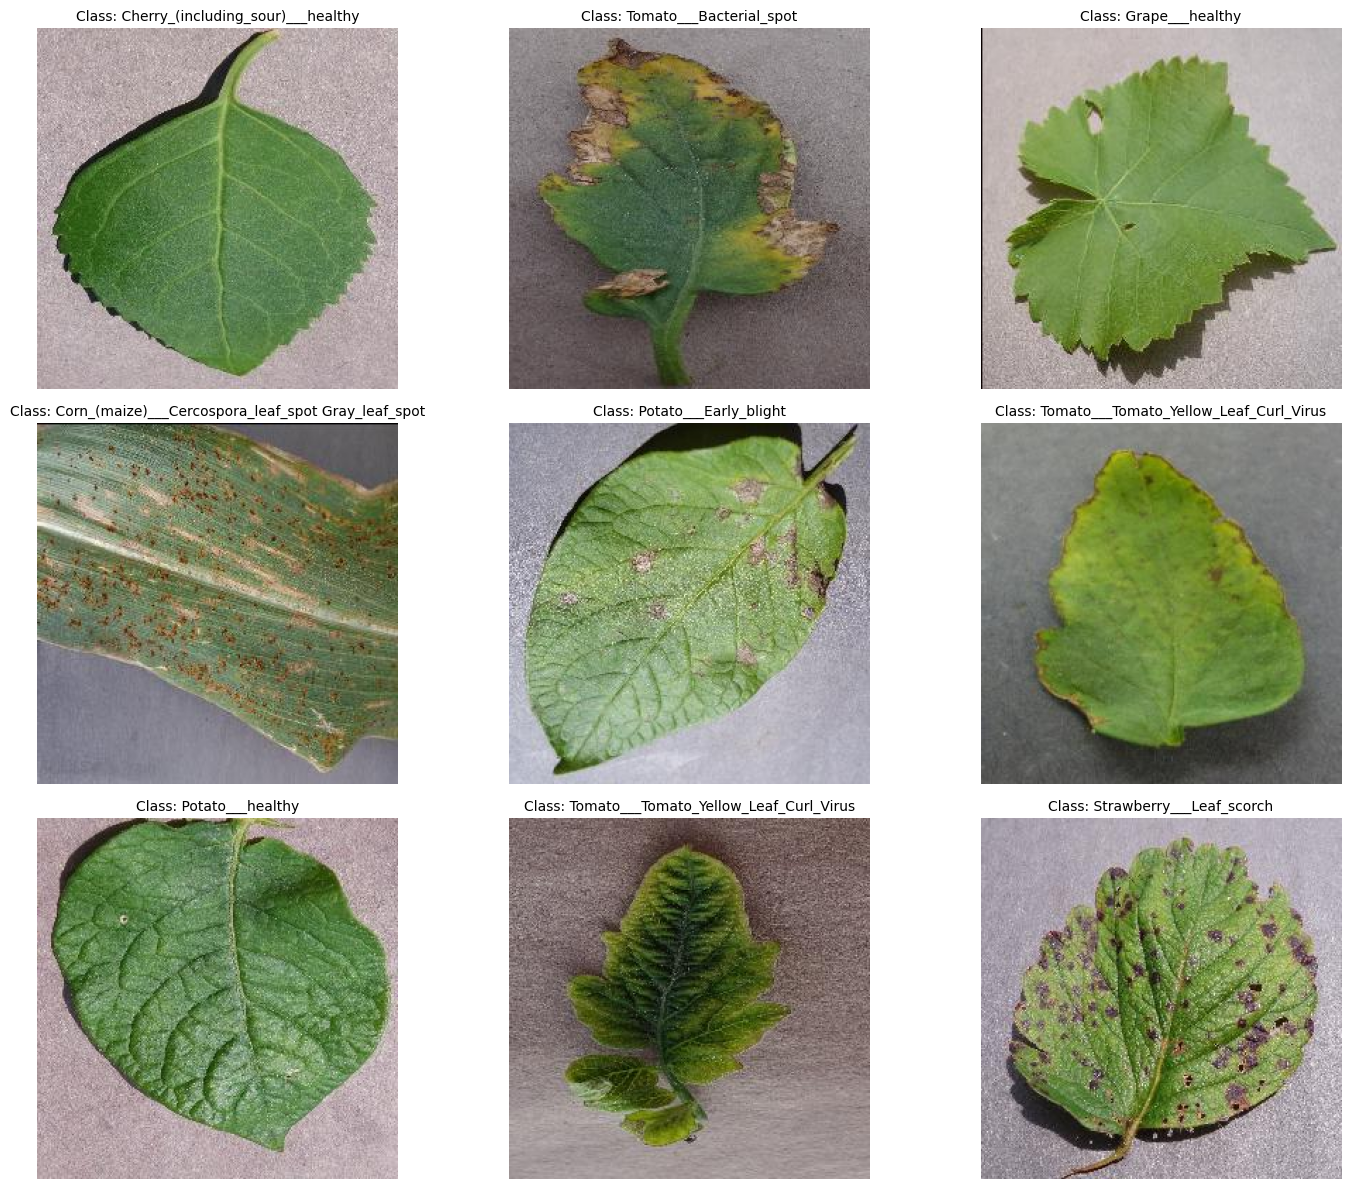

In [3]:

def plot_random_dataset_samples(data_path, grid_size=(3, 3)):
    """
    Plots random images from the dataset folders.
    """
    classes = [d for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))]
    num_images = grid_size[0] * grid_size[1]
    
    plt.figure(figsize=(15, 12))
    
    for i in range(num_images):
        # 1. Select a random class folder
        random_class = random.choice(classes)
        class_dir = os.path.join(data_path, random_class)
        
        # 2. Select a random image from that folder
        images = [f for f in os.listdir(class_dir) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
        if not images:
            continue
            
        random_img_name = random.choice(images)
        img_path = os.path.join(class_dir, random_img_name)
        
        # 3. Open and plot the image
        img = Image.open(img_path)
        plt.subplot(grid_size[0], grid_size[1], i + 1)
        plt.imshow(img)
        plt.title(f"Class: {random_class}", fontsize=10)
        plt.axis('off')
        
    plt.tight_layout()
    plt.show()

# --- CONFIGURATION ---
# Point this to your 'train' or 'val' folder
DATASET_DIR = "C:\\Users\\OMEN\\Documents\\Plant Disease Prediction\\data\\New Plant Diseases Dataset(Augmented)\\train" 

if os.path.exists(DATASET_DIR):
    plot_random_dataset_samples(DATASET_DIR)
else:
    print(f"Error: Path '{DATASET_DIR}' not found. Please check your dataset location.")

--- Dataset Summary ---
             Count
count    38.000000
mean   1849.868421
std     105.724315
min    1642.000000
25%    1763.500000
50%    1844.500000
75%    1924.500000
max    2022.000000

Total Images: 70295
Total Classes: 38


C:\Users\OMEN\AppData\Local\Temp\ipykernel_9620\3800094858.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.sort_values(by="Count", ascending=False), y="Class Name", x="Count", palette="viridis")


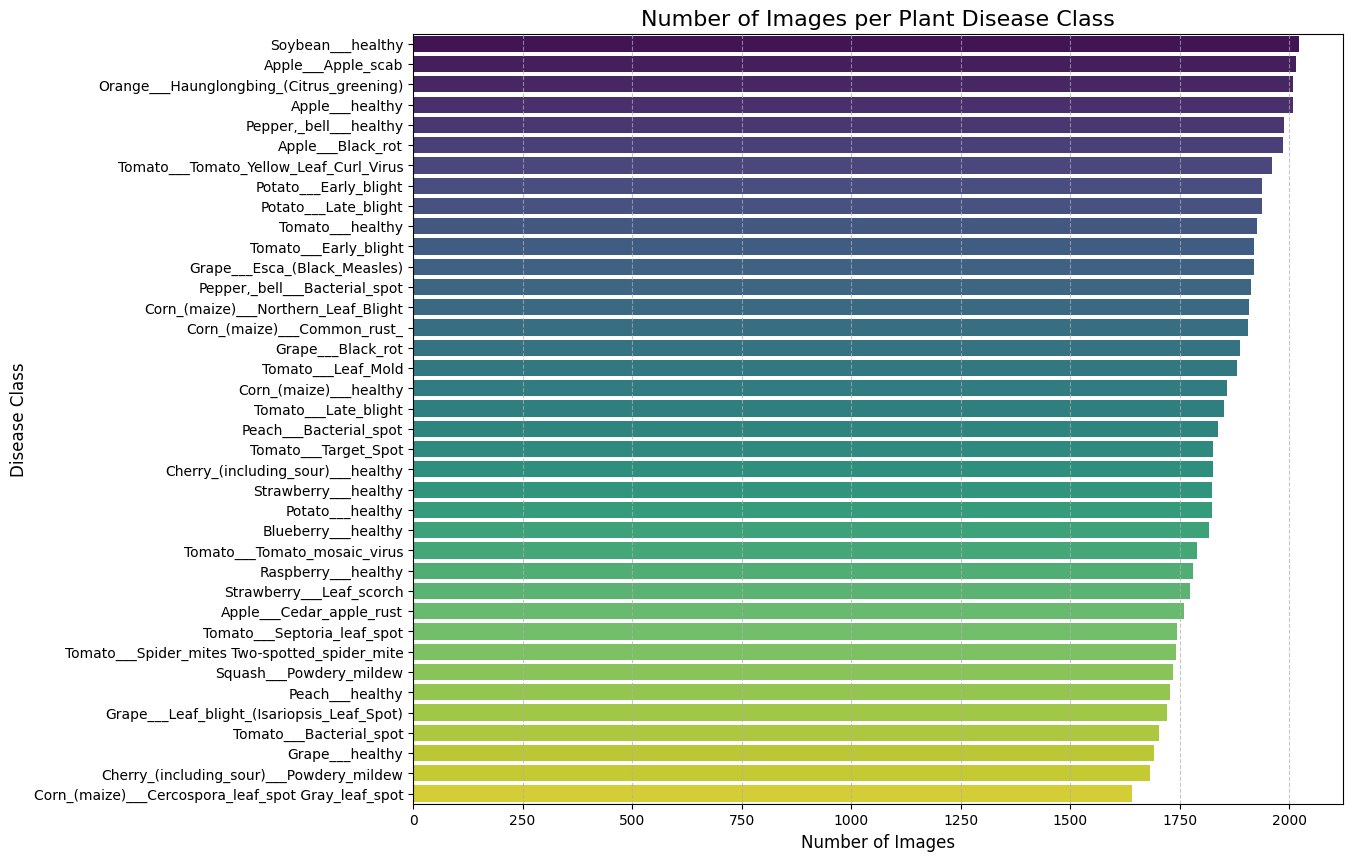


--- Image Resolution Check ---
Sample Image Size: (256, 256) (Width, Height)


In [5]:
def perform_dataset_eda(data_path):
    # 1. Collect Data Stats
    stats = []
    for class_name in os.listdir(data_path):
        class_folder = os.path.join(data_path, class_name)
        if os.path.isdir(class_folder):
            images = [f for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
            stats.append({
                "Class Name": class_name,
                "Count": len(images)
            })
    
    df = pd.DataFrame(stats)
    
    # 2. Print Summary Table
    print("--- Dataset Summary ---")
    print(df.describe())
    print(f"\nTotal Images: {df['Count'].sum()}")
    print(f"Total Classes: {len(df)}")

    # 3. Visualize Class Distribution
    plt.figure(figsize=(12, 10))
    sns.barplot(data=df.sort_values(by="Count", ascending=False), y="Class Name", x="Count", palette="viridis")
    plt.title("Number of Images per Plant Disease Class", fontsize=16)
    plt.xlabel("Number of Images", fontsize=12)
    plt.ylabel("Disease Class", fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

    # 4. Check Resolution of a few samples
    print("\n--- Image Resolution Check ---")
    sample_img_path = os.path.join(data_path, df.iloc[0]['Class Name'], os.listdir(os.path.join(data_path, df.iloc[0]['Class Name']))[0])
    with Image.open(sample_img_path) as img:
        print(f"Sample Image Size: {img.size} (Width, Height)")

# --- RUN EDA ---
# Path to your training data folder
TRAIN_DIR = "data/New Plant Diseases Dataset(Augmented)/train" 

if os.path.exists(TRAIN_DIR):
    perform_dataset_eda(TRAIN_DIR)
else:
    print(f"Directory {TRAIN_DIR} not found.")

In [6]:
import os

# Change 'data/train' to your actual dataset folder path
path = 'data/New Plant Diseases Dataset(Augmented)/train' 

for folder in sorted(os.listdir(path)):
    folder_path = os.path.join(path, folder)
    if os.path.isdir(folder_path):
        print(f"{folder}: {len(os.listdir(folder_path))}")

Apple___Apple_scab: 2016
Apple___Black_rot: 1987
Apple___Cedar_apple_rust: 1760
Apple___healthy: 2008
Blueberry___healthy: 1816
Cherry_(including_sour)___Powdery_mildew: 1683
Cherry_(including_sour)___healthy: 1826
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 1642
Corn_(maize)___Common_rust_: 1907
Corn_(maize)___Northern_Leaf_Blight: 1908
Corn_(maize)___healthy: 1859
Grape___Black_rot: 1888
Grape___Esca_(Black_Measles): 1920
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 1722
Grape___healthy: 1692
Orange___Haunglongbing_(Citrus_greening): 2010
Peach___Bacterial_spot: 1838
Peach___healthy: 1728
Pepper,_bell___Bacterial_spot: 1913
Pepper,_bell___healthy: 1988
Potato___Early_blight: 1939
Potato___Late_blight: 1939
Potato___healthy: 1824
Raspberry___healthy: 1781
Soybean___healthy: 2022
Squash___Powdery_mildew: 1736
Strawberry___Leaf_scorch: 1774
Strawberry___healthy: 1824
Tomato___Bacterial_spot: 1702
Tomato___Early_blight: 1920
Tomato___Late_blight: 1851
Tomato___Leaf_Mold: 1882
Toma